In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("customer_churn (1).csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Data Manipulation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score

# Data Manipulation
# 1. Extract the 5th column and store it in ‘customer_5’
customer_5 = df.iloc[:, 4]

# 2. Extract the 15th column and store it in ‘customer_15’
customer_15 = df.iloc[:, 14]

# 3. Extract all the male senior citizens whose payment method is electronic check
senior_male_electronic = df[(df['gender'] == 'Male') & 
                            (df['SeniorCitizen'] == 1) & 
                            (df['PaymentMethod'] == 'Electronic check')]

# 4. Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than $100
customer_total_tenure = df[(df['tenure'] > 70) | (df['MonthlyCharges'] > 100)]

# 5. Extract all the customers whose contract is of two years, payment method is mailed check and the value of churn is ‘Yes’
two_mail_yes = df[(df['Contract'] == 'Two year') & 
                  (df['PaymentMethod'] == 'Mailed check') & 
                  (df['Churn'] == 'Yes')]

# 6. Extract 333 random records from the customer_churn dataframe
customer_333 = df.sample(n=333, random_state=42)

# 7. Get the count of different levels from the ‘Churn’ column
churn_count = df['Churn'].value_counts()

print(churn_count)


Churn
No     5174
Yes    1869
Name: count, dtype: int64


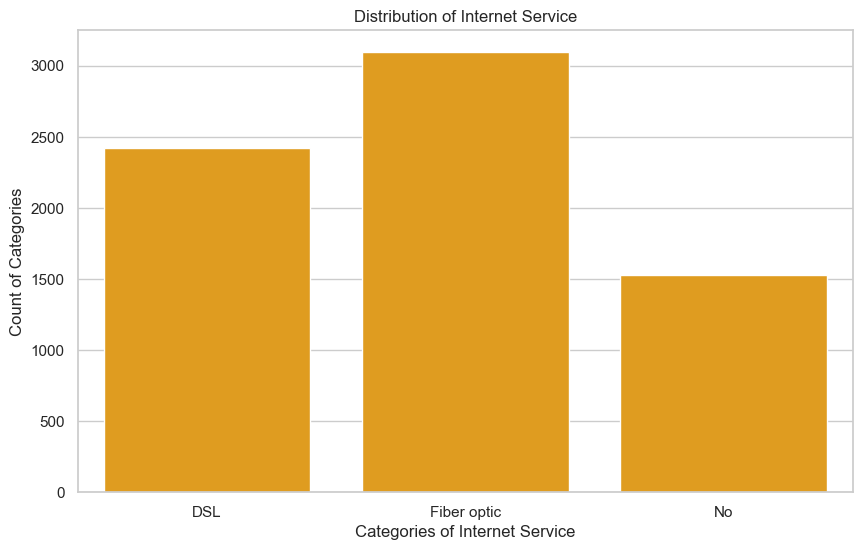

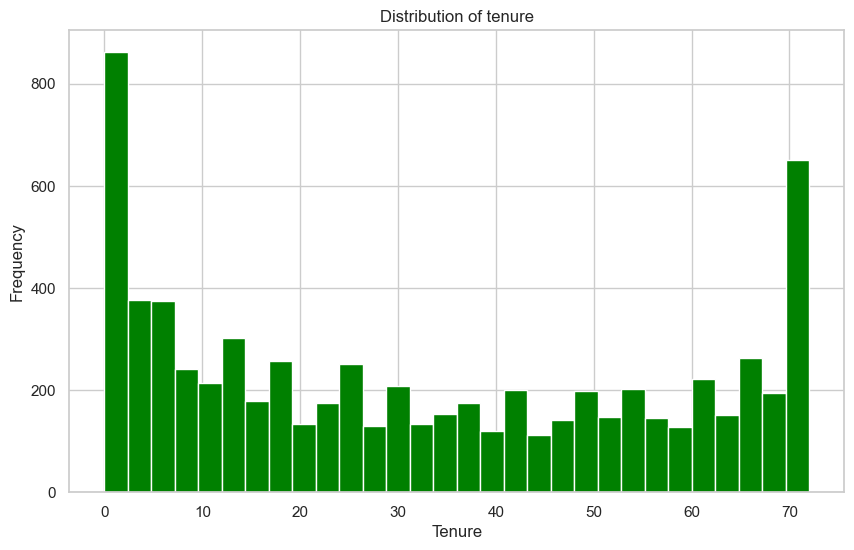

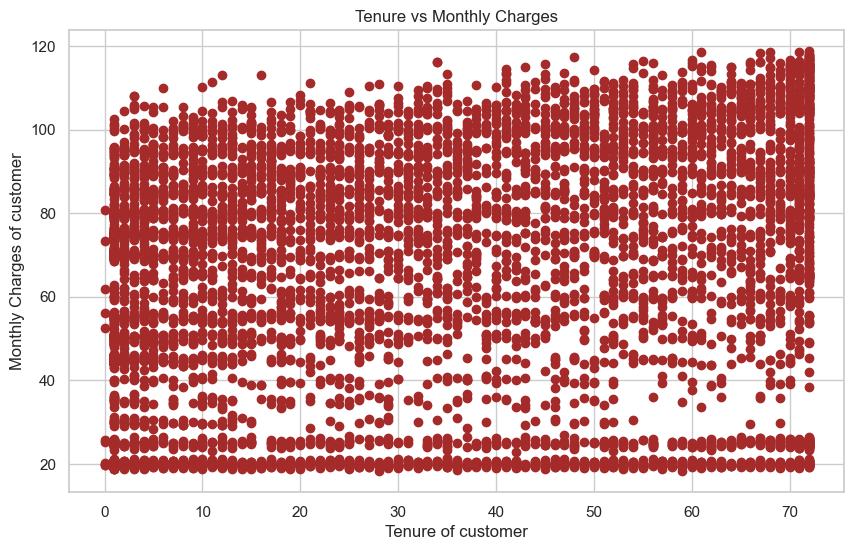

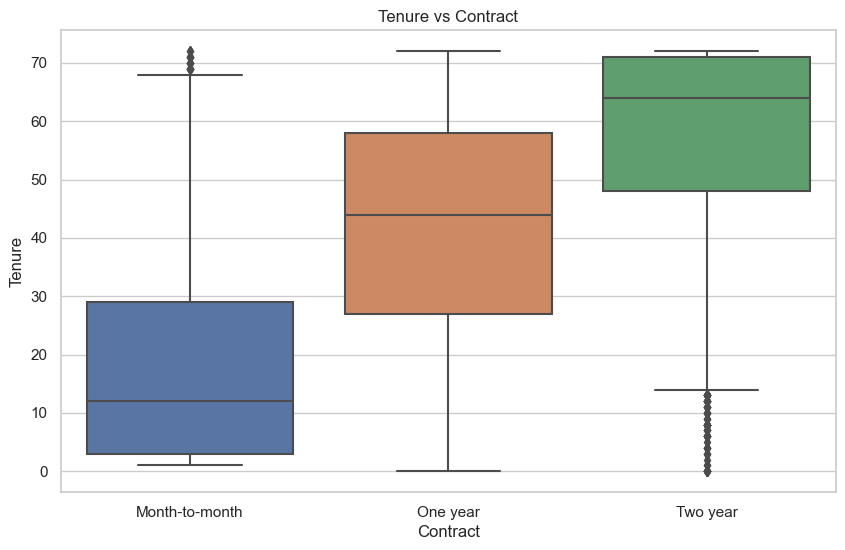

In [5]:
# Data Visualization

# Set the style for the plots
sns.set(style="whitegrid")

# 1. Bar-plot for the ‘InternetService’ column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='InternetService', color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

# 2. Histogram for the ‘tenure’ column
plt.figure(figsize=(10, 6))
plt.hist(df['tenure'], bins=30, color='green')
plt.title('Distribution of tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

# 3. Scatter-plot between ‘MonthlyCharges’ and ‘tenure’
plt.figure(figsize=(10, 6))
plt.scatter(df['tenure'], df['MonthlyCharges'], color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

# 4. Box-plot between ‘tenure’ & ‘Contract’
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Contract', y='tenure')
plt.xlabel('Contract')
plt.ylabel('Tenure')
plt.title('Tenure vs Contract')
plt.show()


In [6]:
# Simple Linear Regression
# Dependent variable: MonthlyCharges, Independent variable: tenure
X = df[['tenure']]
y = df['MonthlyCharges']

# Divide the dataset into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the model on train set and predict the values on test set
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Find the root mean square error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}')

# Error in prediction
error = y_test - y_pred


Root Mean Square Error: 29.07936015646814


In [7]:
error

185    -30.306590
2715   -42.185209
3825   -51.475579
1807    21.243410
132    -24.898812
          ...    
5522    15.043410
6377   -10.456590
5500   -12.791303
2392    29.737316
6705   -10.479115
Name: MonthlyCharges, Length: 2113, dtype: float64

In [8]:
# Simple Logistic Regression
# Dependent variable: Churn, Independent variable: MonthlyCharges
X = df[['MonthlyCharges']]
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Divide the dataset in 65:35 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Build the model on train set and predict the values on test set
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Confusion matrix and accuracy score
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

# Multiple Logistic Regression
# Dependent variable: Churn, Independent variables: tenure and MonthlyCharges
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Divide the dataset in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model on train set and predict the values on test set
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Confusion matrix and accuracy score
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.7287104622871047
Confusion Matrix:
[[1797    0]
 [ 669    0]]
Accuracy: 0.7977288857345636
Confusion Matrix:
[[944  92]
 [193 180]]


In [9]:
# Decision Tree
# Dependent variable: Churn, Independent variable: tenure
X = df[['tenure']]
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Divide the dataset in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model on train set and predict the values on test set
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Confusion matrix and accuracy score
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.7572746628814763
Confusion Matrix:
[[951  85]
 [257 116]]


In [10]:
# Random Forest
# Dependent variable: Churn, Independent variables: tenure and MonthlyCharges
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Divide the dataset in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the model on train set and predict the values on test set
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Confusion matrix and accuracy score
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.7605300520586843
Confusion Matrix:
[[1341  198]
 [ 308  266]]
